Copyright (c) 2019 Computational-Medicine  <br>

(`pyradiomics` is licensed under the BSD 3-Clause "New" or "Revised" License, Copyright 2017 Harvard Medical School)

**Radiomics**

*Radiomic data has the potential to uncover disease characteristics that fail to be appreciated by the naked eye. The central hypothesis of radiomics is that distinctive imaging algorithms quantify the state of diseases, and thereby provide valuable information for personalized medicine. Radiomics has emerged from oncology, but can be applied to other medical problems where a disease is imaged.* (http://www.radiomics.io)

**Radiomic technologies**

*Engineered features:* Engineered features are hard-coded features which are often based on expert domain knowledge. Measures include intensity, shape, texture, wavelet, and LOG features, and have been found useful in several clinical areas, such as oncology and cardiology.

*Deep learning:* Deep learning methods can learn feature representations automatically from data. These features are included in neural nets’ hidden layers. Within radiomics, deep learning involves utilizing convolutional neural nets - or convnets - for building predictive or prognostic non-invasive biomarkers.

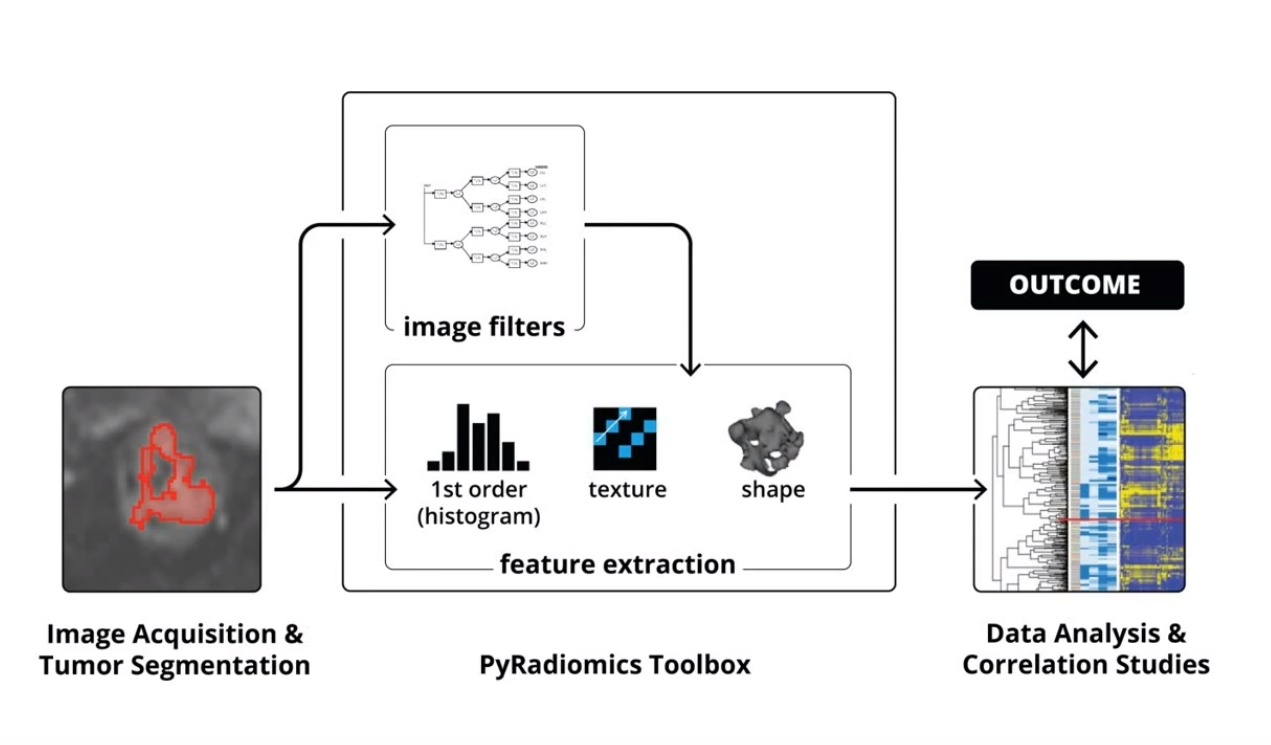

In [17]:
from IPython.display import Image
Image(filename='./assets/pyradiomics_workflow.png', width=600)

Radiomics aims to quantify phenotypic characteristics on medical imaging through the use of automated algorithms. Radiomic artificial intelligence (AI) technology, either based on engineered hard-coded algorithms or deep learning methods, can be used to develop noninvasive imaging-based biomarkers. However, lack of standardized algorithm definitions and image processing severely hampers reproducibility and comparability of results. To address this issue, van Griethuysen et al. have developed [`PyRadiomics`](https://github.com/Radiomics/pyradiomics), a flexible open-source platform capable of extracting a large panel of engineered features from medical images. PyRadiomics is implemented in Python and can be used standalone or using [3D Slicer](https://www.slicer.org). In their Cancer Research 2017 paper, van Griethuysen et al. discuss the workflow and architecture of PyRadiomics and demonstrate its application in characterizing lung lesions. Source code, documentation, and examples are publicly available at www.radiomics.io. The platform, supporting both the feature extraction in 2D and 3D, can be used to calculate single values per feature for a region of interest (“segment-based”) or to generate feature maps (“voxel-based”). The aim has been to establish a reference standard for radiomic analyses, providing a tested and maintained resource, and to grow the community of radiomic developers addressing critical needs in cancer research.

Publication to be cited: _van Griethuysen, J. J. M., Fedorov, A., Parmar, C., Hosny, A., Aucoin, N., Narayan, V., Beets-Tan, R. G. H., Fillon-Robin, J. C., Pieper, S., Aerts, H. J. W. L. (2017). Computational Radiomics System to Decode the Radiographic Phenotype. Cancer Research, 77(21), e104–e107._ https://doi.org/10.1158/0008-5472.CAN-17-0339 ;
YouTube: https://www.youtube.com/watch?v=ZF1rTtRW3eQ

**Feature Classes**

Currently supports the following feature classes:

- First Order Statistics
- Shape-based (2D and 3D)
- Gray Level Cooccurence Matrix (GLCM)
- Gray Level Run Length Matrix (GLRLM)
- Gray Level Size Zone Matrix (GLSZM)
- Gray Level Dependece Matrix (GLDM)
- Neighboring Gray Tone Difference Matrix (NGTDM)

**Filter Classes**

Aside from the feature classes, there are also some built-in optional filters:

- Laplacian of Gaussian (LoG, based on SimpleITK functionality)
- Wavelet (using the PyWavelets package)
- Square
- Square Root
- Logarithm
- Exponential
- Gradient (Magnitude)
- Local Binary Pattern (LBP) 2D / 3D

# PyRadiomics toolbox in Python

In this notebook, we will load 2 brain datasets with segmentations of brain tumors.  The `radiomics` package will be used to extract a set of features, and the "signatures" will be compared.

For more detailed examples and links to source code, visit http://radiomics.io

In [13]:
# Radiomics package
from radiomics import featureextractor

import six, numpy as np

## Setting up data

Here we use `SimpleITK` (referenced as `sitk`, see http://www.simpleitk.org/ for details) to load two brain images and the corresponding segmentations as label maps.

In [14]:
import os
import SimpleITK as sitk

from radiomics import getTestCase

imagepath_1, labelpath_1 = getTestCase('brain1')
imagepath_2, labelpath_2 = getTestCase('brain2')

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)


## Show the images

Using `matplotlib.pyplot` (referenced as `plt`), display the images in grayscale and labels in color.

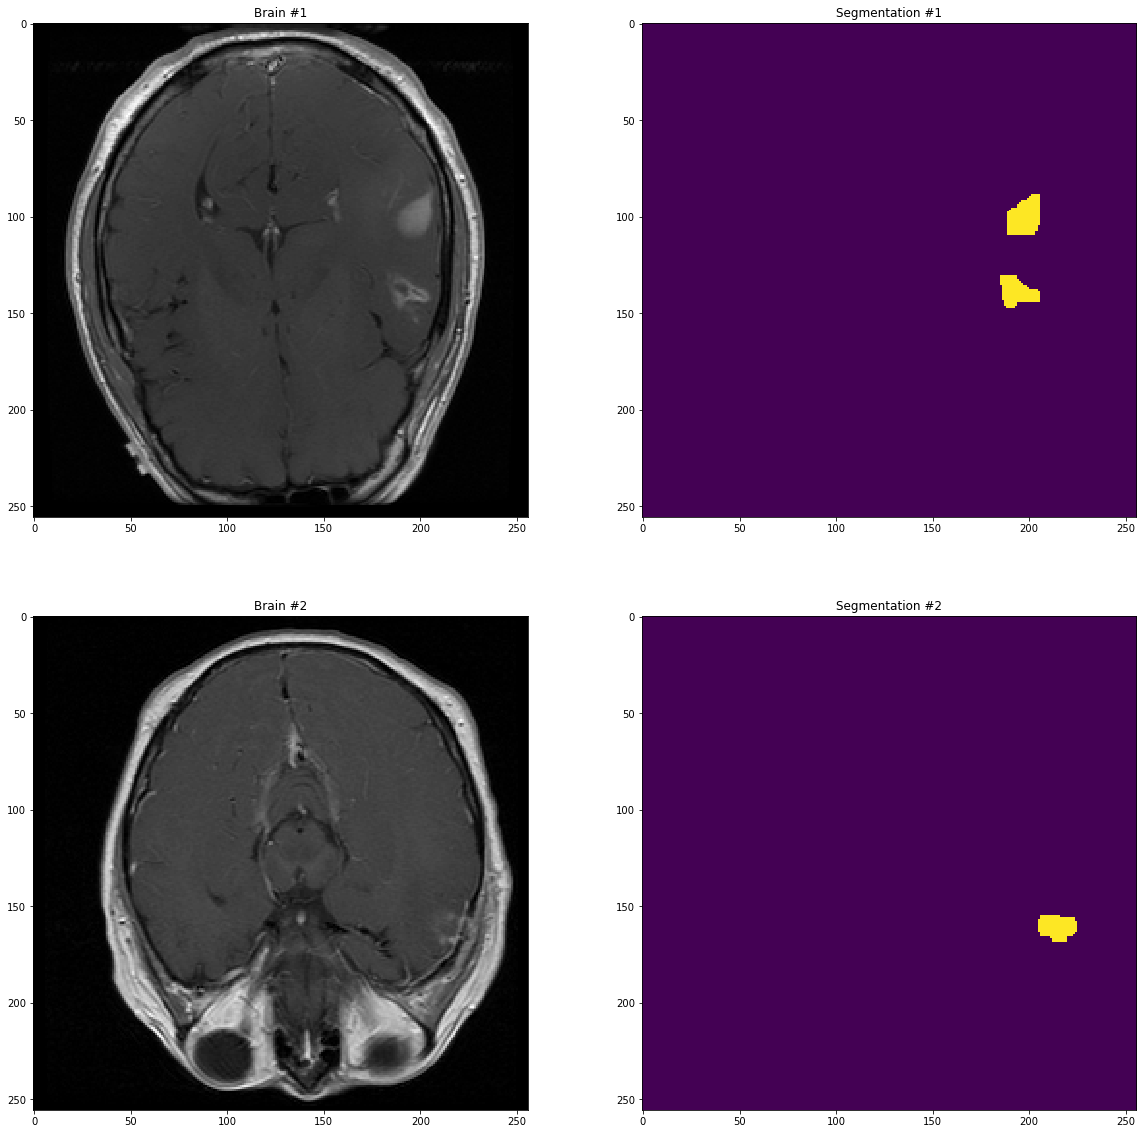

In [15]:
# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label_1)[12,:,:])        
plt.title("Segmentation #1")

# Second image
plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")        
plt.title("Brain #2")

plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(label_2)[8,:,:])        
plt.title("Segmentation #2")

plt.show()

## Extract the features

Using the `radiomics` package, first construct an `extractor` object from the parameters set in `Params.yaml`.  Then generate features for the two images.

In [10]:
import os
# Instantiate the extractor
params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', 'Params.yaml')

extractor = featureextractor.RadiomicsFeaturesExtractor(params)
result_1 = extractor.execute(image_1, label_1)
result_2 = extractor.execute(image_2, label_2)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


## Prepare for plotting

Because we'd like to plot the feature vectors, create `numpy` arrays for features starting with `original_` (excluding meta-features).

In [11]:
# Make an array of the values
feature_1 = np.array([])
feature_2 = np.array([])

for key, value in six.iteritems(result_1):
    if key.startswith("original_"):
        feature_1 = np.append ( feature_1, result_1[key])
        feature_2 = np.append ( feature_2, result_2[key])

## Plot

Plot the two feature vectors and the difference.  Feature values have a wide range of magnitudes and are plotted on a log scale.

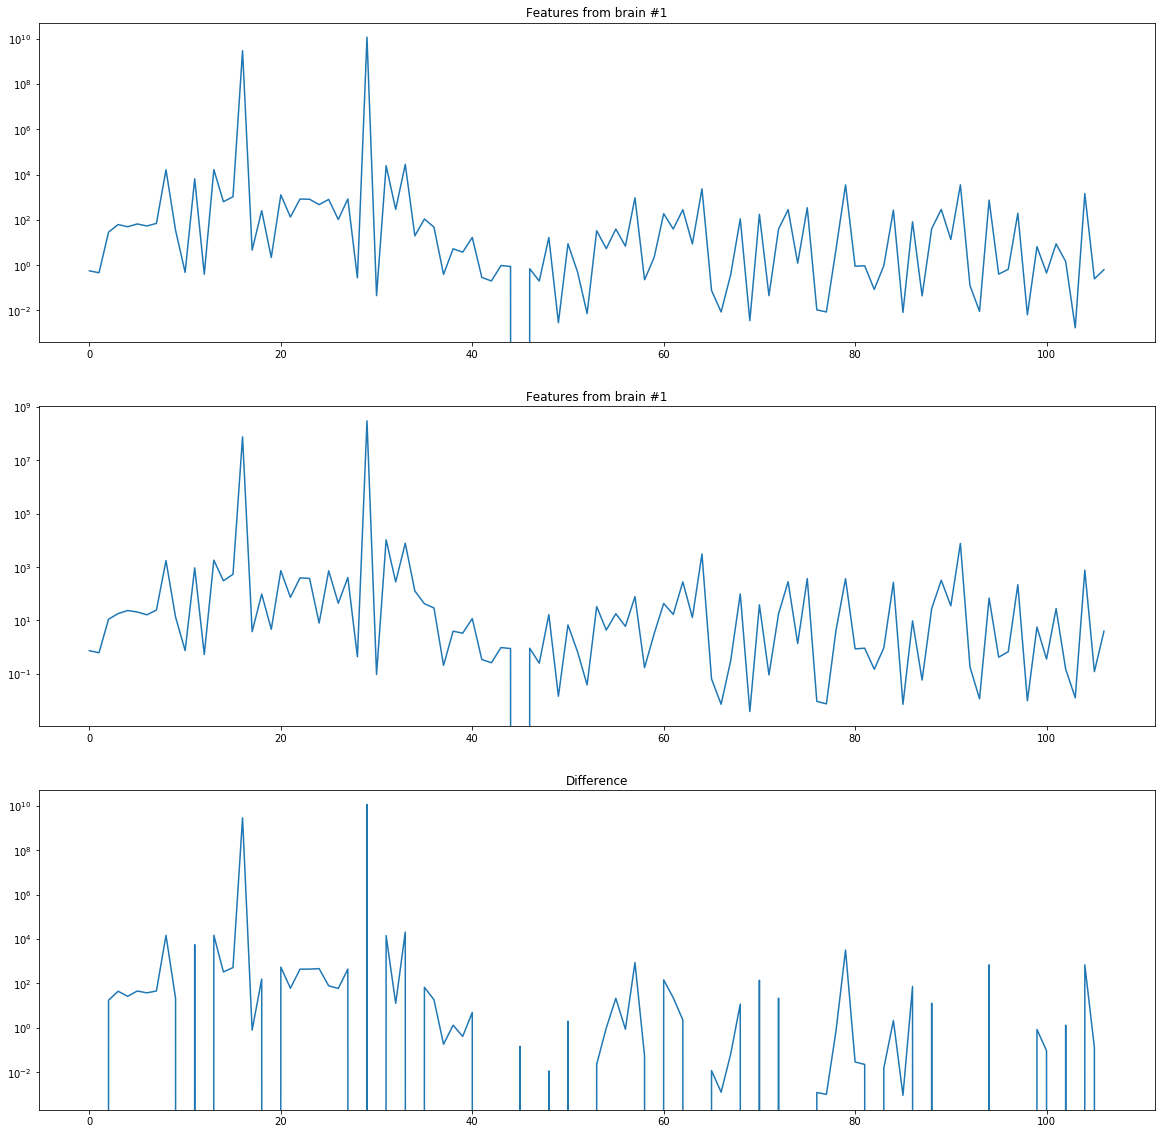

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(feature_1)
plt.yscale('log')
plt.title ( "Features from brain #1")
        
plt.subplot(3,1,2)
plt.plot(feature_2)
plt.yscale('log')
plt.title ( "Features from brain #1")

plt.subplot(3,1,3)
plt.plot(feature_1 - feature_2)
plt.yscale('log')
plt.title ( "Difference")
plt.show()